# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK1"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData011["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData011["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable

,DUREAL,UNREAL
0,100,100


# Run Time

In [4]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.011 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData011["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData011["Time_DUREAL"])/60,2)))
print("UNREAL 0.011 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData011["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData011["Time_UNREAL"])/60,2)))
# print("DUREAL 0.023 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData023["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData023["Time_DUREAL"])/60,2)))
# print("UNREAL 0.023 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData023["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData023["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 0.31| Max: 0.36
DUREAL 0.011 Time (minutes): Mean: 2.22| Max: 4.02
UNREAL 0.011 Time (minutes): Mean: 2.24| Max: 3.99


# Error Vec

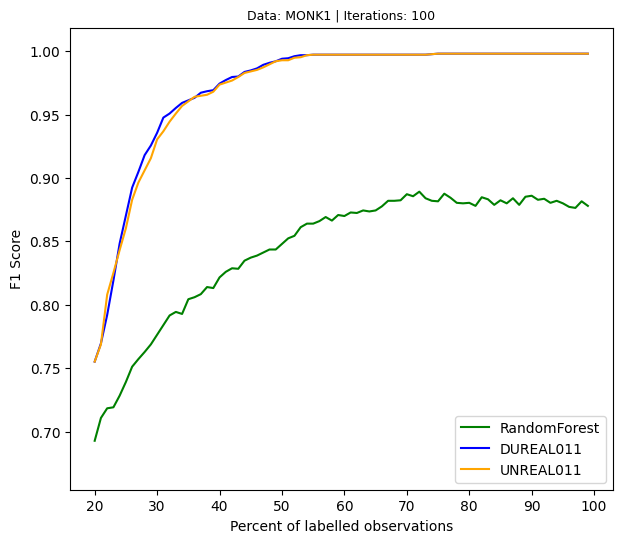

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData011['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL009": "blue",
    "UNREAL009": "orange",
    "DUREAL011": "blue",
    "UNREAL011": "orange"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL009": "dashed",
    "UNREAL009": "dashed",
    "DUREAL011": "solid",
    "UNREAL011": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL011 = AnalyzedData011["Error_DUREAL"],
                 UNREAL011 = AnalyzedData011["Error_UNREAL"],
                Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,30],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [7]:
AnalyzedDataLarge = AnalyzedData011

# Selection History

In [8]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
95,9.317460,0,0,0,1,0,0,0,1,0,0,1,0
85,11.390625,0,0,1,0,0,0,0,1,0,1,0,1
105,12.360656,0,0,0,0,1,0,0,0,0,1,0,1
93,12.833333,0,0,0,1,0,0,1,0,0,1,0,0
103,13.295775,0,0,0,0,1,0,1,0,0,0,1,0


# Tree Counts

In [9]:
# UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
# DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
# AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
#                               DUREAL_Average_TreeCountsRatioSmall,
#                               np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
#                              columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

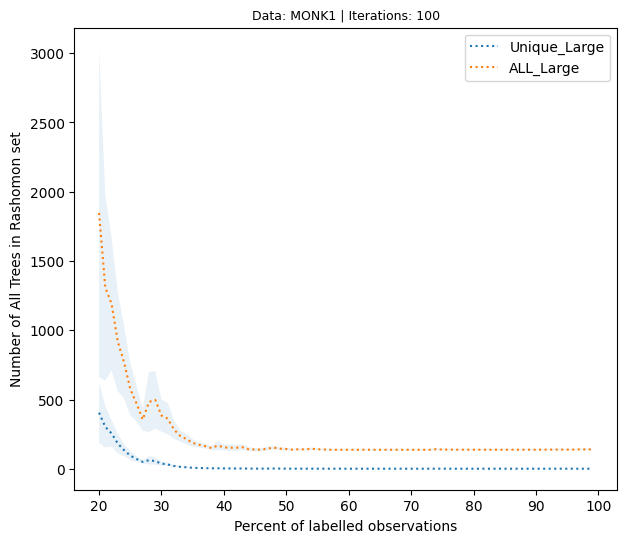

In [11]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                 Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                 ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

## Number of Unique Trees

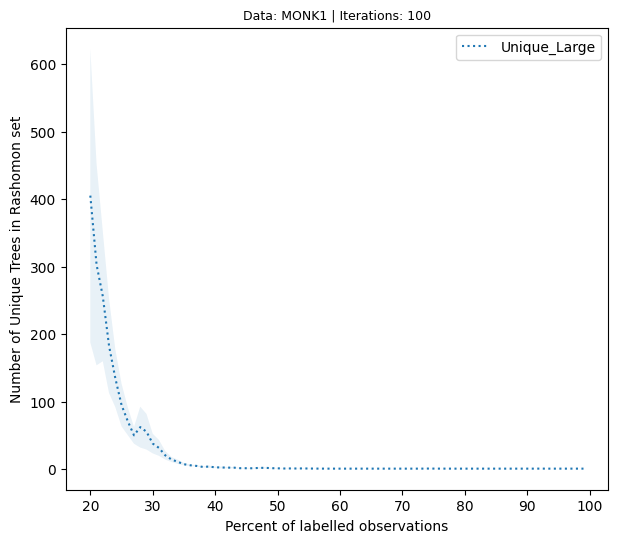

In [12]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                 Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)